In [155]:
# script to get the campaign average TTS 
# date created: 2/15/2020
# author: sofia chelpon

In [150]:
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module 
import tts_mod

In [151]:
# ---------- read in data 
contrast_ratios = pd.read_pickle("/mnt/home/sofia/TTS/paper_2020/get_ratios/contrast_ratios.pkl")
ratios_sort = contrast_ratios.sort_values(['BL_tau'])

utbl = ratios_sort['All RF']
tau = ratios_sort['BL_tau'].values

In [152]:
#from tts_package import prep_for_tts
help(tts_mod)

Help on module tts_mod:

NAME
    tts_mod

DESCRIPTION
    A python module for obtaining the greens function and other tts related outputs 
    needs inputs: tau, utbl as arrays - these are the 'truth'
    provides outputs: my_mustar, my_r2, my_gf, my_t(d), mean_age(d), mode_age(d)

FUNCTIONS
    get_tts(utbl, tau, t, exp_decay_matrix, LT)
    
    my_greens_func(k_coef, t, exp_decay_matrix, LT)
    
    prep_for_tts(tau)
    
    prep_tts(tau)

FILE
    /mnt/home/sofia/TTS/paper_2020/base_tts_code/tts_mod.py




In [153]:
# test the module 
t, exp_decay_matrix, LT = tts_mod.prep_for_tts(tau)
my_mustar, my_r2, my_gf, my_t, mean_age, mode_age = tts_mod.get_tts(utbl, tau, t, exp_decay_matrix, LT)

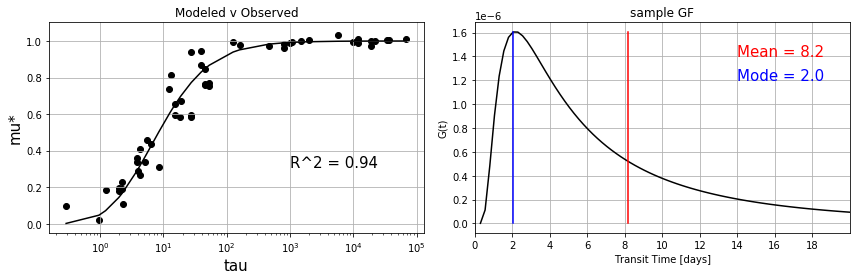

In [154]:
# --------------- plot 
fig, axes = plt.subplots(figsize=(12, 4), ncols=2)
ax0, ax1 = axes

#### my mu star 
ax0.plot(tau, my_mustar, color = 'k')
ax0.scatter(tau, utbl, color = 'k')
ax0.set_xscale('log')
ax0.grid(which = 'major')
ax0.set_title('Modeled v Observed')
ax0.set_xlabel('tau', fontsize = 15)
ax0.set_ylabel('mu*', fontsize = 15)

ax0.text(10**3, 0.31, 'R^2 = '+ str(round(my_r2, 2)), size=15)

#### my gf 
ax1.plot(my_t, my_gf, color = 'k')

ax1.set_xlim([0, 20])
ax1.set_xticks(np.arange(0, 20, step=2))
ax1.grid(which = 'major')
ax1.set_title('sample GF')
ax1.set_ylabel('G(t)')
ax1.set_xlabel('Transit Time [days]')

# add mean, mode
ax1.plot([mean_age, mean_age], [0, np.max(my_gf)], color = 'r')
ax1.plot([mode_age, mode_age], [0, np.max(my_gf)], color = 'b')

ax1.text(14, 1.4e-6, 'Mean = '+ str(round(mean_age, 1)), size=15, color = 'r')
ax1.text(14, 1.2e-6, 'Mode = '+ str(round(mode_age, 1)), size=15, color = 'b')

#ax1.annotate(('Mean = '+ str(round(mean, 1))), xy = (0.8, 0.95),
#            xytext=(0.8, 0.95), textcoords='axes fraction')

plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2,2))
plt.tight_layout()